<a href="https://colab.research.google.com/github/fabioolivei/Fabio_Olivei_Data_Sciense/blob/main/ML_Applications_in_Fetal_Health_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img width="70%" src="https://cdn-images-1.medium.com/max/800/1*A0vtvf_qYlpJMR3VXeBiSw.png"></left>


#**Introduction**

Fetal health refers to the well-being of a baby during the prenatal stage, which is from conception until birth. This period is crucial as the foundations for a child’s physical and mental development are laid. Ensuring good fetal health involves several key components, both from medical professionals and expectant parents, particularly the mother.

### **Fetal Health Care:**

*   **Dietary Considerations:**
    
    *   **Essential Nutrients:** Beyond basic vitamins, emphasize omega-3 fatty acids (important for brain development), calcium, and iron. Foods like leafy greens, lean meats, and certain fish (low in mercury) are recommended.
    *   **Hydration:** Adequate water intake is crucial for amniotic fluid balance, fetal kidney function, and overall maternal health.
    *   **Dietary Restrictions:** Avoid high-mercury fish, unpasteurized dairy, and undercooked meats to reduce the risk of infections.
*   **Advanced Screening Tests:**
    
    *   **Genetic Screening:** Tests like NIPT (Non-Invasive Prenatal Testing) can detect chromosomal abnormalities early in the pregnancy.
    *   **Anomaly Scan:** Around 18-21 weeks, an in-depth ultrasound checks for physical developmental issues.
*   **Emotional and Mental Well-being:**
    
    *   **Support Networks:** Building a strong support network, including family, friends, and support groups, can provide emotional stability.
    *   **Professional Counseling:** For those experiencing significant stress or mental health challenges, professional counseling can be highly beneficial.
*   **Sleep:**
    
    *   **Quality Sleep:** Adequate sleep is important for fetal development. Sleep position adjustments, such as sleeping on the side, are often recommended as pregnancy progresses.

# **Understanding the Problem**

### **Project Objectives:**

The primary goal is to develop a Machine Learning (ML) model that accurately classifies fetal health into three categories: 'Normal', 'Suspect', and 'Pathological'. This model aims to support early detection and intervention strategies, enhancing prenatal care and improving pregnancy outcomes.


This model is designed to enhance prenatal care by enabling early detection and intervention for fetal health issues. The key requirements for the model include high accuracy, effective utilization of a comprehensive clinical dataset, and achieving a high AUC-ROC score. The dataset includes vital parameters such as fetal heartbeat patterns, movements, and uterine contractions.

###**Anticipated Benefits:**

The anticipated benefits of this project are manifold. It is expected to aid in early detection of fetal health issues, improve prenatal care, reduce healthcare costs, and assist healthcare professionals in customizing treatments. The success of the project will be measured by the model's accuracy, its implementation in clinical settings, and its impact on improving fetal health outcomes and prenatal care efficiency.



<left><img width="70%" src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*G9HfSX631-BlqskQFcCvKg.jpeg"></left>

# **Data Understanding**

*   **No Missing Values**: Each column has 2126 non-null entries, which indicates that there are no missing values in your dataset. This is beneficial as it means you won't have to deal with imputing missing data.
    
*   **Unique Values**: The number of unique values in each column varies significantly. For example, 'baseline value' has 48 unique values, whereas 'severe\_decelerations' has only 2. This indicates a varied range of data, with some columns potentially being categorical (like 'severe\_decelerations' and 'fetal\_health') and others continuous.
    
*   **Potential Categorical Data**: Columns like 'severe\_decelerations', 'fetal\_health', and 'histogram\_tendency' have very few unique values (2, 3, and 3 unique values respectively), suggesting they might be categorical variables. The 'fetal\_health' column, for instance, could represent different health statuses.
    
*   **No Duplicated Rows**: There are no duplicated rows in your dataset, which is good for the integrity of your analysis.
    
*   **Duplicated Values in Certain Columns**: Some columns, like 'histogram\_number\_of\_peaks', 'histogram\_variance', and 'histogram\_tendency', have duplicated values. For example, 'histogram\_number\_of\_peaks' has 6 duplicated values. This is normal in datasets, but it's important to understand the nature of these duplicates – whether they are natural or indicative of some data entry errors.
    



In [ ]:
# Installing Pycaret
!pip install pycaret
!pip install mlflow


<left><img width="70%" src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*BFS9oTnrShsV6ETUlEs8vQ.jpeg"></left>

### **Feature Glossary**

`Baseline Value` ---> Standard Fetal Heartbeat Rate (FHR)

`Accelerations` ---> Frequency of accelerations each second

`Fetal Movement` ---> Frequency of fetal movements each second

`Uterine Contractions` ---> Frequency of uterine contractions each second

`Light Decelerations` ---> Frequency of LDs each second

`Severe Decelerations` ---> Frequency of SDs each second

`Prolongued Decelerations` ---> Frequency of PDs each second

`Abnormal Short Term Variability` ---> Proportion of time with unusual short-term variability

`Mean Value Of Short Term Variability` ---> Average level of short-term variability

`Percentage Of Time With Abnormal Long Term Variability` ---> Proportion of time with unusual long-term variability

`Mean Value Of Long Term Variability` ---> Average level of long-term variability

`Histogram Width` ---> The breadth of the histogram based on all the values from a single recording

`Histogram Min` ---> Smallest value on the histogram

`Histogram Max` ---> Largest value on the histogram

`Histogram Number Of Peaks` ---> Count of peaks present in the examination histogram

`Histogram Number Of Zeroes` ---> Count of zero-value instances in the examination histogram

`Histogram Mode` ---> Most frequent value in the histogram

`Histogram Mean` ---> Average value across the histogram

`Histogram Median` ---> Middle value in the histogram distribution

`Histogram Variance` ---> Measure of the spread of values in the histogram

`Histogram Tendency` ---> Directional trend of the histogram

### Target Definition:

`Fetal Health` ---> Categorization of fetal well-being: (1 - Normal, 2 - Questionable, 3 - Critical)





In [ ]:
# Pycaret import
from pycaret.classification import *

In [ ]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_style()
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/gabrielnd312/ClassificationAutoML_Fetal_Health/main/fetal_health.csv")

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# Seeing the collumns
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
# Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Data Size
print('rows:{}'.format(df.shape[0]))
print('cols:{}'.format(df.shape[1]))

rows:2126
cols:22


In [ ]:
# Unique Values
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [ ]:
# Missing Values
df.isnull().sum().sum()

0

In [ ]:
# Duplicated Values
duplicated = df[df.duplicated()] == True
duplicated.sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 6
histogram_number_of_zeroes                                0
histogram_mode                          

# **Data Preparation**


1.  **Data Splitting**: The dataset is split into a training set and a test set. This is a standard practice in machine learning to evaluate the model on unseen data.
    
2.  **Handling Outliers**: There is a function defined for capping outliers in the dataset based on the Interquartile Range (IQR) method. This approach adjusts extreme values, which can improve model performance.
    
3.  **Feature Scaling and Transformation**: The `setup` function from PyCaret is used for data preparation. It includes normalization and transformation of the data, which are crucial steps to ensure that the model is not biased towards variables with higher magnitudes.
    
4.  **Removing Multicollinearity**: The `setup` function also includes a parameter for removing multicollinearity (if the correlation between two independent variables is higher than a specified threshold). This is important to ensure the model accurately assesses the independent effect of each predictor.
    
5.  **Data Transformation**: transformation techniques were realized, likely to convert the data into a more suitable format for modeling.
    
6.  **Feature Engineering**: feature engineering may be implicitly included within the PyCaret setup, which can automatically create new features and select the most relevant ones for modeling.
    

### Observations

*   **Automated Process**: The use of PyCaret suggests an automated approach to many of the standard data preparation tasks, which can be efficient but might lack the customization of manual data preprocessing.
*   **Data Quality**: The dataset appears to be of good quality, with no missing values and appropriate measures taken to handle outliers and multicollinearity.
*   **Ready for Modeling**: The dataset, after these preparation steps, seems ready for the modeling phase, where various machine learning algorithms will be applied and evaluated.

In [ ]:
# outliers in other columns
def count_outliers(column):
    """Count the number of outliers in a column using the IQR method."""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number)

# Count outliers for each numeric column
outliers_count = numeric_cols.apply(count_outliers)

# Convert to DataFrame for display
outliers_count_df = outliers_count.reset_index()
outliers_count_df.columns = ['Variable', 'Number of Outliers']
outliers_count_df

,Variable,Number of Outliers
0,baseline value,0
1,accelerations,14
2,fetal_movement,307
3,uterine_contractions,1
4,light_decelerations,150
5,severe_decelerations,7
6,prolongued_decelerations,178
7,abnormal_short_term_variability,0
8,mean_value_of_short_term_variability,70
9,percentage_of_time_with_abnormal_long_term_var...,309


### **Number of Outliers**

- **High Number of Outliers**: Variables such as 'fetal_movement', 'light_decelerations', 'prolongued_decelerations', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_number_of_zeroes', and 'fetal_health' have a notably high number of outliers. Outliers can significantly affect the mean and standard deviation of these variables, and could be symptomatic of rare events or errors in the data. They need to be investigated to determine if they should be kept, adjusted, or removed.

- **Variables with Zero Outliers**: 'abnormal_short_term_variability', 'histogram_width', 'histogram_min', and 'histogram_tendency' have no outliers. This indicates that the data points for these variables fall within a common range without extreme values, which could suggest a more uniform distribution.


In [ ]:
# Descriptive Statistics
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### **Descriptive Statistics**


- **Baseline Value**: The 'baseline value' has a mean of approximately 133 with a standard deviation of about 9.48. The max value is notably higher than the 75th percentile, which could suggest a right-skewed distribution.

- **Accelerations and Decelerations**: 'Accelerations' have a very low mean, indicating that they are rare occurrences within the dataset. 'Severe_decelerations' and 'prolongued_decelerations' also have low means, which matches with their clinical rarity. However, the 'max' values for 'fetal_movement' and 'light_decelerations' are relatively high, which likely contributes to the high number of outliers.

- **Variability Metrics**: 'Mean_value_of_short_term_variability' and 'percentage_of_time_with_abnormal_long_term_variability' show some variability, with the latter having a max value much higher than the 75th percentile, indicating potential right-skewed distribution and the presence of outliers.

- **Fetal Health**: The variable 'fetal_health' shows a broad range of values with a significant number of outliers. Considering that it is likely a categorical variable (given that it is expected to have limited unique values), this high number of outliers could indicate misclassification or a need to reassess how health categories are defined.

#**Exploratory analysis**

After an initial basic analysis, we will further check the important points of our dataset so that we can understand and carry out more detailed work.


With this information we can define important observation points in our dataset.

This type of analysis can `demonstrate patterns` and help us understand what the information says about each variable.

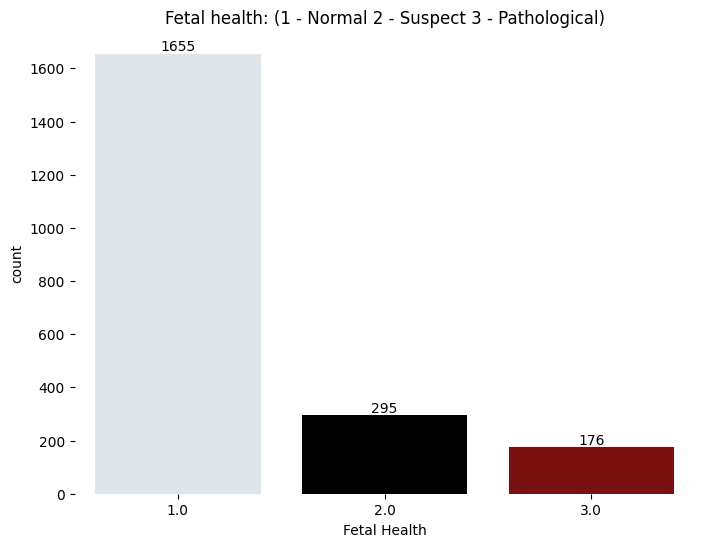

<Figure size 640x480 with 0 Axes>

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(8, 6))

# Define the color palette as a list
colors = ["#DDE6ED", "black", "darkred"]

# Create a count plot using Seaborn with the specified colors
ax = sns.countplot(data=df, x='fetal_health', palette=colors)

# Loop through the bars in the plot and add labels to each bar
for i in ax.containers:
    ax.bar_label(i)

# Customize the appearance of the plot by hiding the spines (borders)
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['left'].set_visible(False)   # Hide the left spine
ax.spines['bottom'].set_visible(False) # Hide the bottom spine

# Set the label for the x-axis
ax.set_xlabel('Fetal Health')

# Set the title of the plot
plt.title('Fetal health: (1 - Normal 2 - Suspect 3 - Pathological)')

# Display the plot
plt.show()

# Clear the current figure to make it ready for next plot (if any)
plt.clf()


*   **Class Imbalance**: There is a significant class imbalance, with the 'Normal' category being the most common by a large margin (1655 counts), followed by 'Suspect' (295 counts), and 'Pathological' being the least common (176 counts). This imbalance can influence the performance of machine learning models, as they may become biased towards predicting the majority class ('Normal' in this case).
    
*   **Clinical Interpretation**: The distribution suggests that most fetal health assessments in this dataset are categorized as 'Normal'. However, a significant number are considered 'Suspect', which could require further medical investigation. The 'Pathological' category, while the smallest, represents the most critical cases that likely need immediate medical attention.
    
*   **Analytical Focus**: Given the class imbalance, analyses should be particularly attentive to the 'Suspect' and 'Pathological' cases to understand the conditions leading to these classifications. This could involve looking at the associated features (like accelerations, decelerations, and variability metrics) that are most indicative of these health statuses.
    

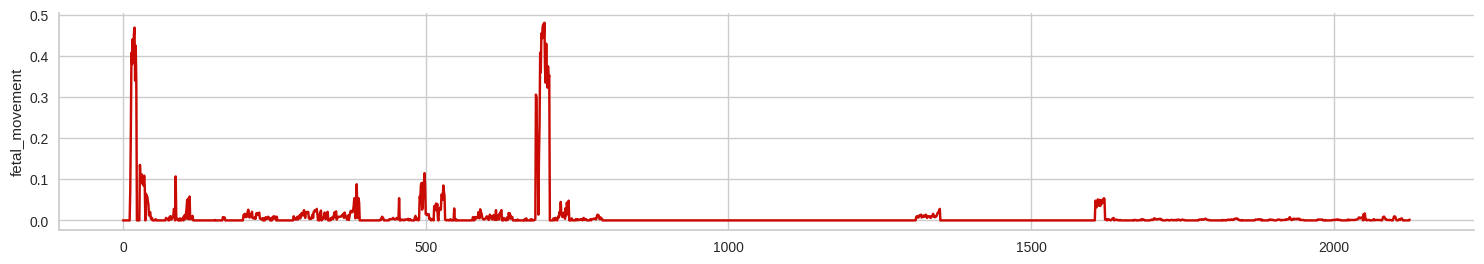

In [ ]:
# 'df' is my  DataFrame and 'fetal_movement' is a column in it
variable = df.fetal_movement

# Create a line plot using Seaborn
# 'x' should be defined to specify the variable on the x-axis. Assuming index of df for x-axis.
# 'y' is the variable to plot, which is 'fetal_movement' in this case.
# 'aspect' and 'height' control the size and shape of the plot.
# 'color' specifies the color of the line.
sns.relplot(x=df.index, y=variable, kind='line', aspect=5, height=3, color='r')

# Display the plot
plt.show()

Noting mostly low movement values with occasional spikes suggesting brief periods of higher activity. These spikes might be real movements or data noise, and they don't show any regular pattern. The highest spikes could be outliers and may need further study. For analysis, these movement peaks could be important features if they're not just noise. The data's recording resolution also impacts interpretation, as real-time, high-resolution data could naturally show intermittent spikes, while lower-resolution data might make normal movements seem like sustained high activity.

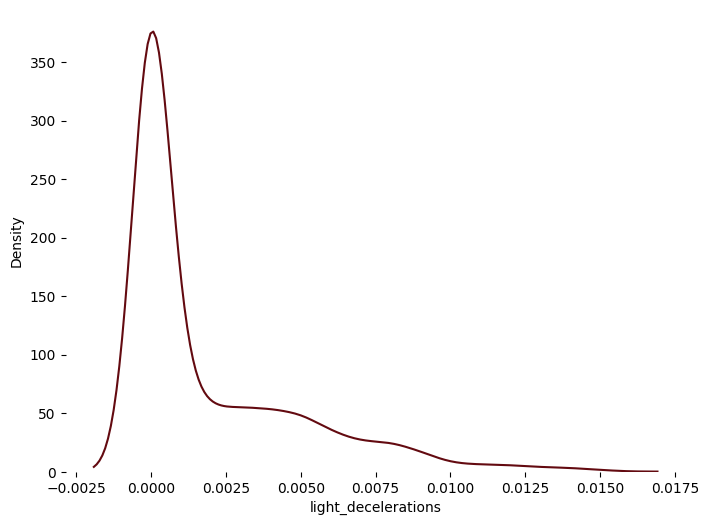

In [ ]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(8, 6))

# Create a KDE plot using Seaborn
# 'data = df' specifies the DataFrame as the data source
# 'x= 'light_decelerations'' sets the column for the KDE plot on x-axis
# 'color' sets the color of the KDE curve
ax = sns.kdeplot(data=df, x='light_decelerations', color='#630A10')

# Customize the appearance of the plot by hiding the spines (borders)
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['left'].set_visible(False)   # Hide the left spine
ax.spines['bottom'].set_visible(False) # Hide the bottom spine

# Set the label for the x-axis
ax.set_xlabel('Light Decelerations')

# Display the plot
plt.show()


*   **Concentration Around Zero**: The plot shows a significant peak at or near zero, suggesting that 'light\_decelerations' mostly have very low values or do not occur at all for most of the observations in the dataset. This aligns with clinical expectations as light decelerations in a fetal heart rate are typically infrequent events.
    
*   **Skewness**: The distribution is highly skewed to the right, with a long tail extending towards the higher values of 'light\_decelerations'. This indicates that while most values are concentrated near zero, there are a few cases with higher values which could be potential outliers or rare instances with a higher number of light decelerations.
    
*   **Low Variability for Most Observations**: The majority of the data points are clustered in a narrow range close to zero, suggesting that there isn't much variability in 'light\_decelerations' across most observations.
    
*   **Outliers or Extreme Values**: The long tail towards the higher end of the distribution suggests that there are outliers or extreme values present. These could be cases of concern in a clinical setting and may warrant further investigation.

    
*   **Clinical Relevance**: In the context of fetal monitoring, light decelerations can be a normal occurrence during contractions, but frequent light decelerations might need to be investigated by healthcare professionals.

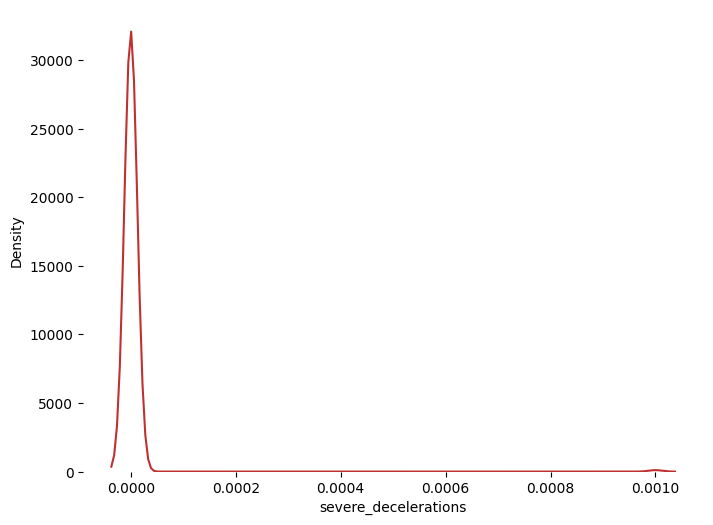

In [ ]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize = (8,6))

# Create a KDE plot using Seaborn
ax = sns.kdeplot(data = df, x= 'severe_decelerations', color='#BF3131')


# Customize the appearance of the plot by hiding the spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('severe_decelerations')

# Display the plot
plt.show()

This chart is about 'severe_decelerations' in fetal heart rates are mostly absent, with a density plot showing a concentration near zero and a right-skewed distribution indicating rare occurrences. There are occasional outliers which could be clinically important as they suggest potential stress or complications. Most data points show little variation, but the few instances of severe decelerations, though rare, could be significant for predicting adverse fetal outcomes and warrant close medical attention.

In summary, the 'severe\_decelerations' variable is characterized by its rarity and the presence of extreme values, which aligns with the medical understanding that such events should not occur frequently. The few non-zero observations could be clinically important and should be analyzed carefully.

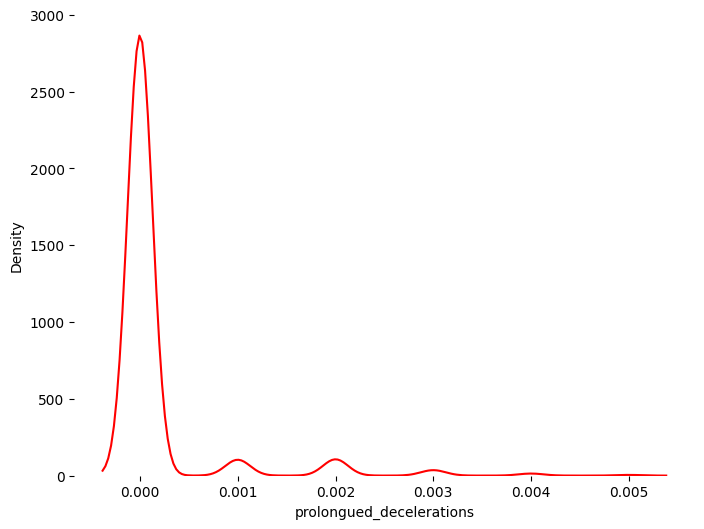

In [ ]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize = (8,6))

# Create a KDE plot using Seaborn
ax = sns.kdeplot(data = df, x= 'prolongued_decelerations', color='red')

# Customize the appearance of the plot by hiding the spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('prolongued_decelerations')

# Display the plot
plt.show()

The density plot for 'prolongued_decelerations' indicates they are rare but clinically significant events, with a distribution heavily skewed to the right, showing most values are near zero with some outliers indicating potential fetal distress.

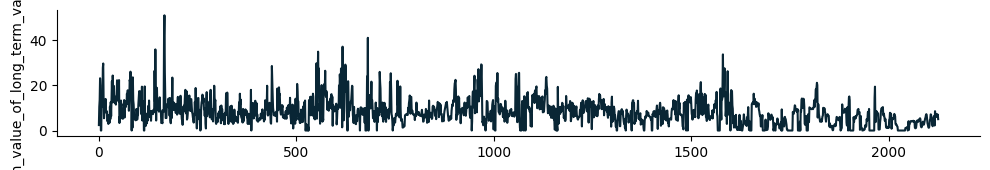

In [ ]:
#  'df' is my DataFrame and 'mean_value_of_long_term_variability' is a column in it
feature = df.mean_value_of_long_term_variability

# Create a line plot using Seaborn
# 'data = df' specifies the DataFrame as the data source
# 'y = feature' sets the 'mean_value_of_long_term_variability' column as the y-axis
# 'x = df.index' is used to set the DataFrame index as the x-axis. This is necessary as Seaborn requires both x and y values.
# 'kind = 'line'' specifies that a line plot should be created
# 'aspect' and 'height' control the size and shape of the plot
# 'color' specifies the color of the line
sns.relplot(data=df, x=df.index, y=feature, kind='line', height=2, aspect=5, color='#092635')

# Display the plot
plt.show()


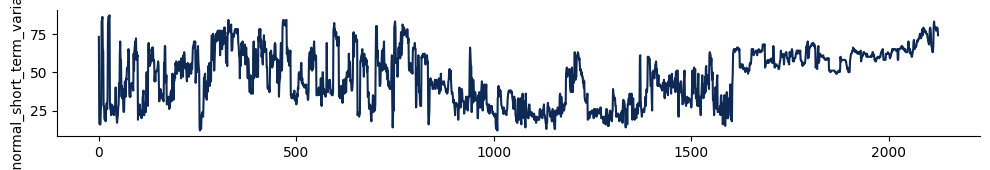

In [ ]:
# Plot a relplot
#  'df' is my DataFrame and 'abnormal_short_term_variability' is a column in it
feature = df.abnormal_short_term_variability
sns.relplot( data = feature, kind = 'line', height=2, aspect=5, color = '#0E2954')
plt.show()

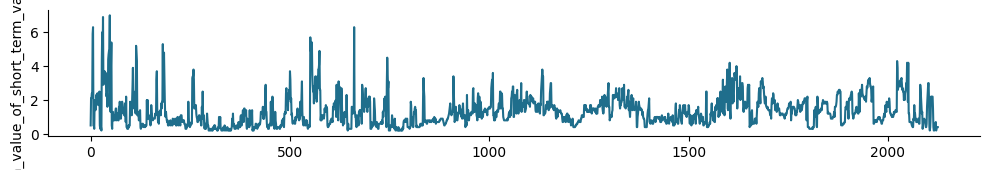

In [ ]:
# Plot a relplot
#  'df' is my DataFrame and 'mean_value_of_short_term_variability' is a column in it
feature = df.mean_value_of_short_term_variability
sns.relplot( data = feature, kind = 'line', height=2, aspect=5, color='#1F6E8C')
plt.show()

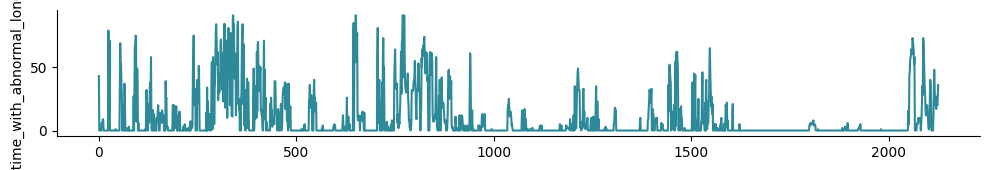

In [ ]:
# Plot a relplot
feature = df.percentage_of_time_with_abnormal_long_term_variability
sns.relplot( data = feature, kind = 'line', height=2, aspect=5, color='#2E8A99')
plt.show()

1.  **Abnormal Short Term Variability**: Shows frequent fluctuations with a range of values, indicating variability in short-term fetal heart rate.
    
2.  **Normal Short Term Variability**: Exhibits less frequent and less intense fluctuations compared to abnormal short-term variability, suggesting a more stable fetal heart rate pattern.
    
3.  **Mean Value of Short Term Variability**: Appears to have a generally stable pattern with occasional spikes, which could indicate moments of increased variability in the fetal heart rate.
    
4.  **Percentage of Time with Abnormal Long Term Variability**: Varies significantly over the observations, with several peaks indicating periods where there is a higher percentage of time with abnormal long-term variability in the fetal heart rate.
    

In summary, these plots reflect variability in the fetal heart rate, both in the short term and long term, with noticeable fluctuations that could be clinically relevant.

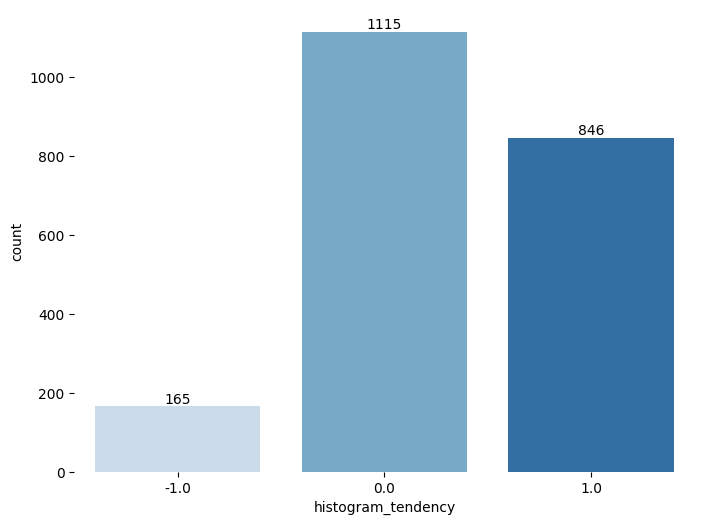

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(8, 6))

# Create a count plot for the 'histogram_tendency' column in the DataFrame 'df'
# The 'palette' parameter sets the color theme of the plot to different shades of blue
ax = sns.countplot(data=df, x='histogram_tendency', palette='Blues')

# Add labels to each bar in the plot to display the count of each category
for i in ax.containers:
    ax.bar_label(i)

# Customize the plot by hiding the spines (the border lines of the plot) for a cleaner look
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['left'].set_visible(False)   # Hide the left spine
ax.spines['bottom'].set_visible(False) # Hide the bottom spine

# Set a label for the x-axis
ax.set_xlabel('Histogram Tendency')

# Display the plot
plt.show()

# Clear the current figure. Useful when creating multiple plots in the same script
plt.clf()


The bar chart shows the distribution of 'histogram\_tendency' values: a majority have a zero tendency, a significant number have a positive tendency, and a smaller portion have a negative tendency. This suggests that most fetal heart rate recordings tend to be symmetrical, with some skewness towards higher (positive) or lower (negative) rates.

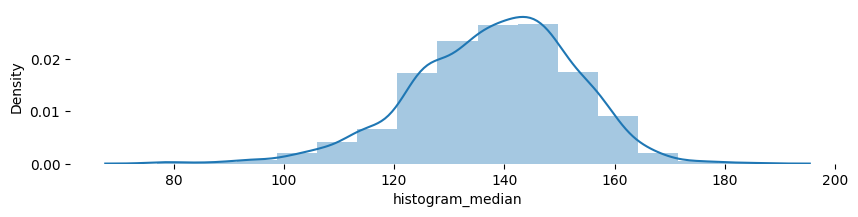

In [ ]:
# Create a figure and axes with a specified size (10 inches wide, 2 inches tall)
fig, ax = plt.subplots(figsize=(10, 2))

# Extract the 'histogram_median' column data from DataFrame 'df'
data = df['histogram_median']

# Create a distribution plot (histogram) for the 'histogram_median' data
# 'bins=15' specifies the number of bins to use in the histogram
ax = sns.distplot(data, bins=15)

# Customize the plot by hiding the spines (the border lines of the plot) for a cleaner look
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['left'].set_visible(False)   # Hide the left spine
ax.spines['bottom'].set_visible(False) # Hide the bottom spine

# Set a label for the x-axis as 'histogram_median'
ax.set_xlabel('Histogram Median')

# Display the plot
plt.show()


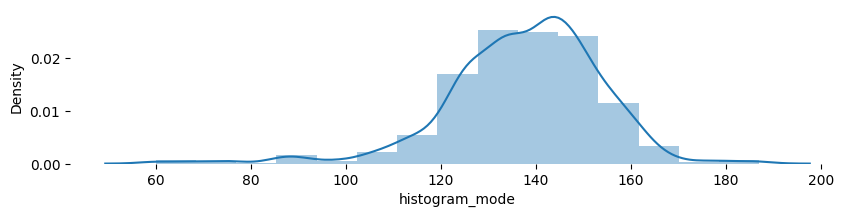

In [ ]:
# Plot histogram
fig, ax = plt.subplots(figsize = (10,2))
data = df['histogram_mode']
ax = sns.distplot(data, bins=15)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('histogram_mode')

plt.show()

The two density plots for the 'histogram_median' and 'histogram_mode', respectively, both displaying a bell-shaped distribution, suggesting that the data for these variables is relatively normally distributed around a central value.

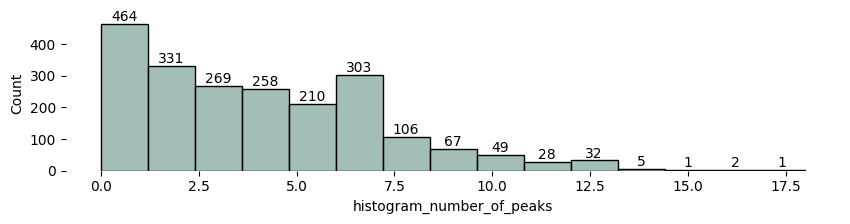

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot histogram

fig, ax = plt.subplots(figsize = (10,2))
ax = sns.histplot(data = df['histogram_number_of_peaks'], bins=15, cumulative=False, color='#84A7A1')
for i in ax.containers:
  ax.bar_label(i)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('histogram_number_of_peaks')

plt.show()
plt.clf()

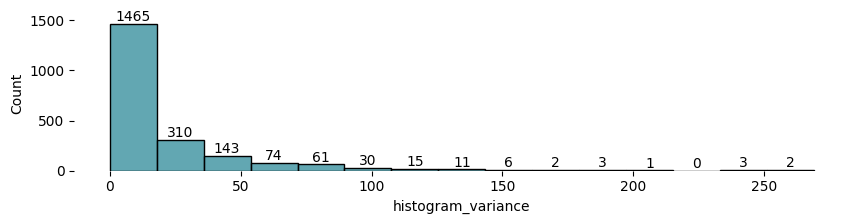

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot histogram

fig, ax = plt.subplots(figsize = (10,2))
ax = sns.histplot(data = df['histogram_variance'], bins=15, cumulative=False, color='#2E8A99')
for i in ax.containers:
  ax.bar_label(i)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('histogram_variance')

plt.show()
plt.clf()

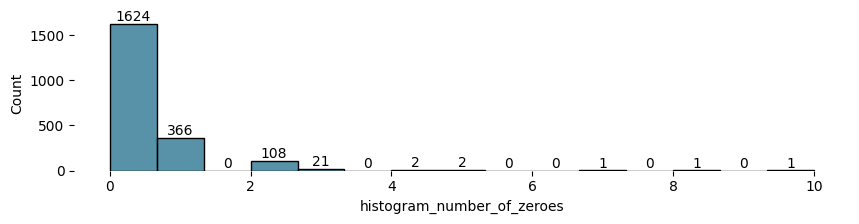

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot histogram
fig, ax = plt.subplots(figsize = (10,2))
ax = sns.histplot(data = df['histogram_number_of_zeroes'], bins=15, cumulative=False, color='#1F6E8C')
for i in ax.containers:
  ax.bar_label(i)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('histogram_number_of_zeroes')

plt.show()
plt.clf()

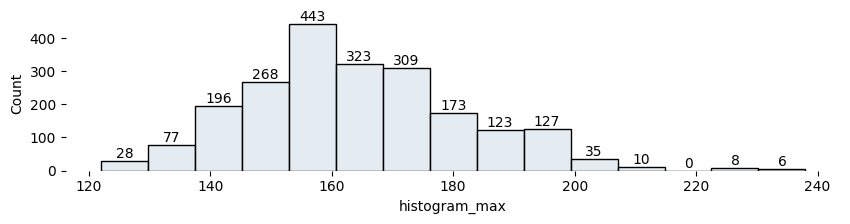

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot histogram


fig, ax = plt.subplots(figsize = (10,2))
ax = sns.histplot(data = df['histogram_max'], bins=15, cumulative=False, color='#DDE6ED')
for i in ax.containers:
  ax.bar_label(i)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('histogram_max')

plt.show()
plt.clf()

<BarContainer object of 15 artists>


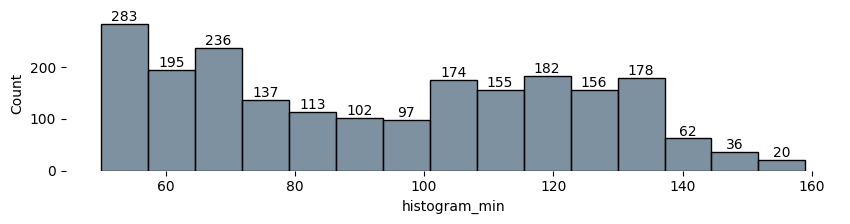

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot histogram

fig, ax = plt.subplots(figsize = (10,2))
ax = sns.histplot(data = df['histogram_min'], bins=15, cumulative=False, color='#526D82')
for i in ax.containers:
  print(i)
  ax.bar_label(i)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('histogram_min')

plt.show()
plt.clf()

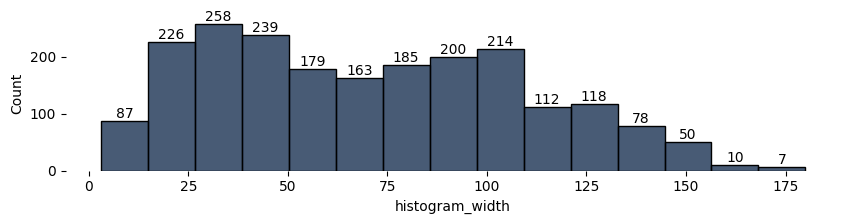

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot histogram

fig, ax = plt.subplots(figsize = (10,2))
ax = sns.histplot(data = df['histogram_width'], bins=15, cumulative=False, color='#0B2447')
for i in ax.containers:
  ax.bar_label(i)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('histogram_width')

plt.show()
plt.clf()

*   **Histogram Number of Peaks**: Most records show a low number of peaks, with a few instances having more.
    
*   **Histogram Variance**: The majority of cases have low variance, suggesting consistent heart rate patterns.
    
*   **Histogram Number of Zeroes**: A large number of records exhibit no zeroes, while a smaller portion shows a few.
    
*   **Histogram Max**: The distribution is fairly spread out, indicating variability in the maximum heart rate values recorded.
    
*   **Histogram Min**: The minimum heart rate values also show variability, with a range of counts across different minima.
    
*   **Histogram Width**: There's a broad distribution of histogram widths, pointing to diversity in the span of heart rate values.

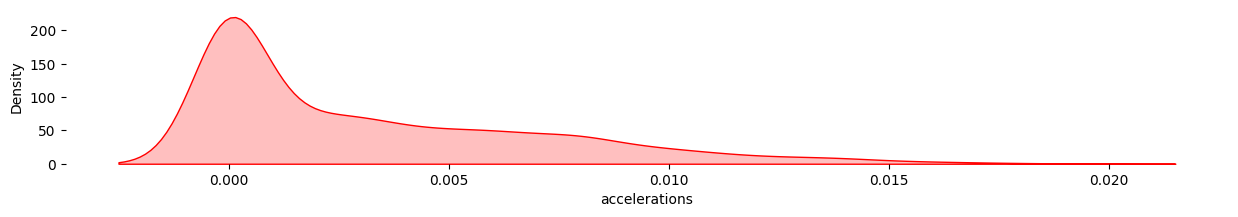

In [ ]:

# Create a figure and axis with a specified size (15 inches wide, 2 inches tall)
fig, ax = plt.subplots(figsize=(15, 2))

# Extract the 'accelerations' column data from DataFrame 'df'
size = df.accelerations

# Create a Kernel Density Estimate (KDE) plot for the 'accelerations' data
# 'fill=True' fills the area under the KDE curve
# 'color='r'' sets the color of the KDE curve to red
ax = sns.kdeplot(size, fill=True, color='r')


# Customize the plot by hiding the spines (the border lines of the plot) for a cleaner look
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['left'].set_visible(False)   # Hide the left spine
ax.spines['bottom'].set_visible(False) # Hide the bottom spine

# Set a label for the x-axis as 'Accelerations'
ax.set_xlabel('Accelerations')

# Display the plot
plt.show()



The density plot suggests that 'accelerations' is mostly concentrated around lower values with a long tail extending to the right, indicating that while most cases have low variability, there are some with higher variability.

#**Correlation Matrix**

An interesting way to identify relationships between variables visually is by using a `correlation matrix.`

It indicates the degree of correlation between variables, demonstrating which ones have the most impact on each other.

Therefore, the lower the number, the lower the correlation between the variables, and the higher the number from `0 to 1`, the higher the level of correlation and impact between the variables.


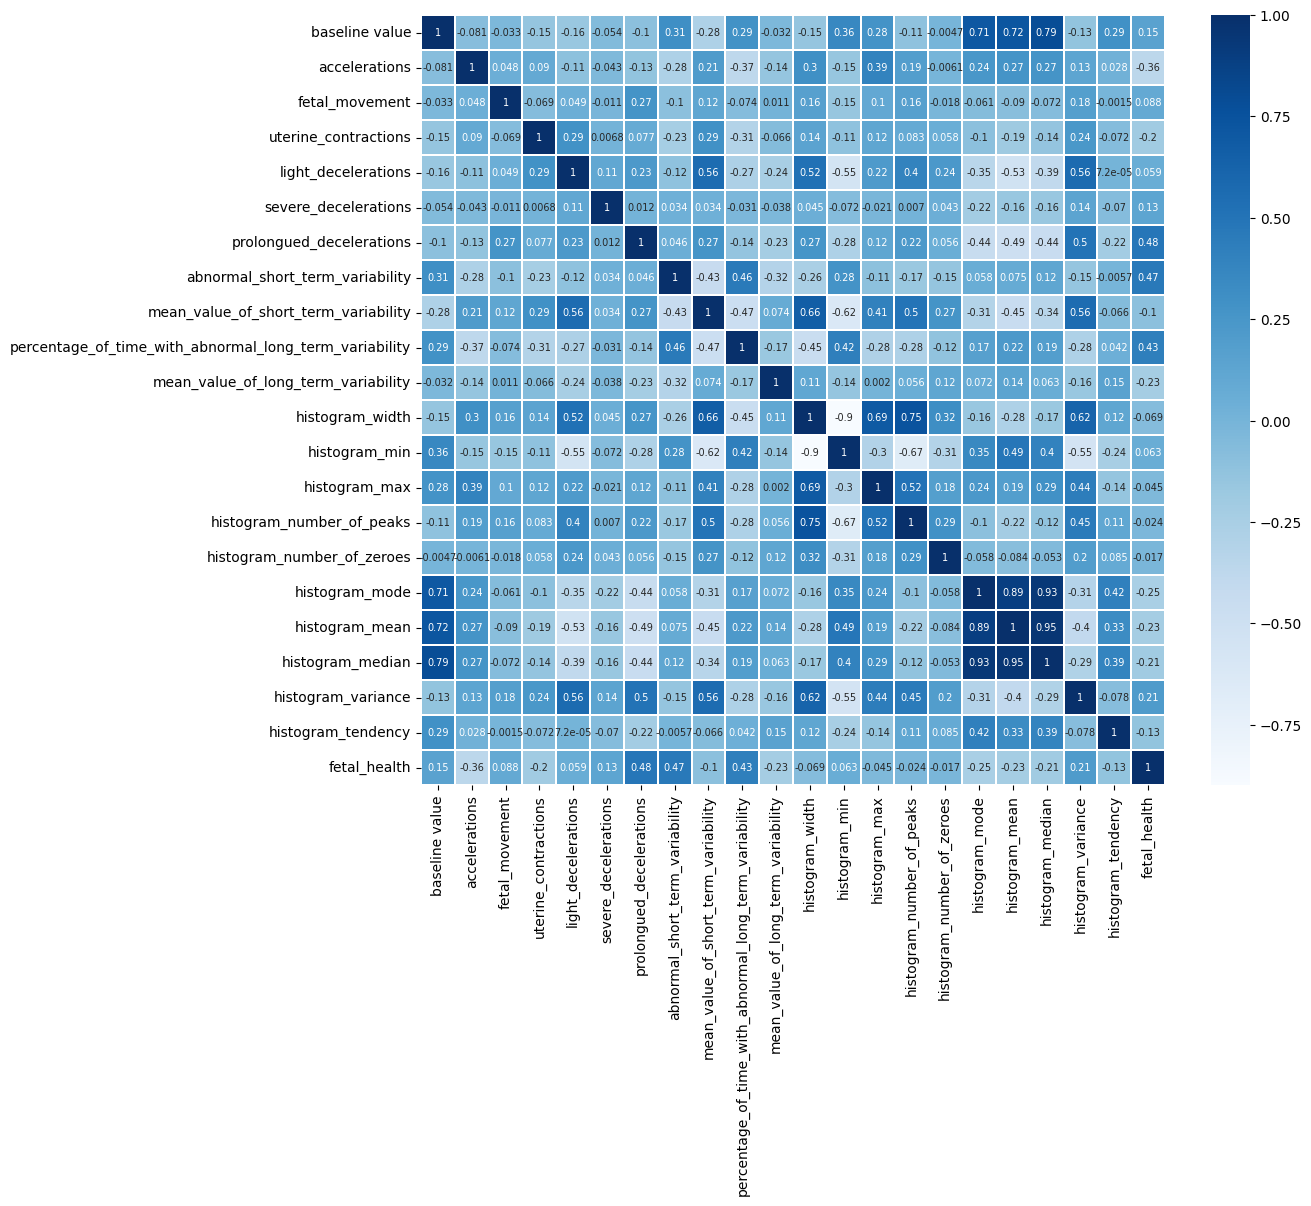

In [ ]:
# Plot Correlation Matrix

fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), cmap = 'Blues',  annot=True, linewidths=0.1, annot_kws={"size": 7})
plt.show()

In [ ]:
# Correlation Matrix
df[['fetal_movement', 'fetal_health']].corr()

,fetal_movement,fetal_health
fetal_movement,1.00000,0.08801
fetal_health,0.08801,1.00000


The correlation between 'fetal_movement' and 'fetal_health' is 0.08801, indicating a very weak positive relationship. In the context of fetal health, this suggests that movements have a minimal direct association with the overall health classification as defined in the dataset.

# **Modeling**

1.  **Model Selection and Comparison**:
    
    *   PyCaret's `compare_models` function is used, which automates the process of comparing a variety of machine learning models to find the best performer based on a specified metric, here likely accuracy.
    *   This approach tests various algorithms and configurations to identify the most accurate model for the dataset.
2.  **Model Building**:
    
    *   This project focus on classification models, appropriate for the task of categorizing fetal health into 'Normal', 'Suspect', and 'Pathological'.
    *   PyCaret supports a range of classification algorithms like decision trees, random forests, gradient boosting machines, etc.
3.  **Hyperparameter Tuning**:
    
    *   After identifying a promising model, and realized hyperparameter tuning. This process involves adjusting the model parameters to improve performance.
    *   The use of a custom search grid in PyCaret's `tune_model` function suggests a thorough approach to optimization.
4.  **Validation Strategy**:
    
    *   The validation of models is likely done through cross-validation as part of PyCaret's automated process. This helps in assessing the model's performance reliably.

### Observations

*   **Efficiency**: The use of PyCaret simplifies and accelerates the model selection and tuning process.
*   **Automated Machine Learning**: This approach reduces the manual effort and expertise required to test and tune various models.
*   **Accuracy Focus**: The emphasis seems to be on maximizing the accuracy of the model, which is a common goal in classification problems.


In [ ]:
# data is equal the DataFrame df
data = df

In [ ]:
# Split Data
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
print(test.shape)
print(train.shape)

(213, 22)
(1913, 22)


In [ ]:
# Function to cap outliers in a column based on the IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping
    series_capped = series.clip(lower_bound, upper_bound)
    return series_capped

# Applying the capping function to each feature in the dataset
data_capped = df.apply(cap_outliers, axis=0)

# Showing an example of the effect of capping on a feature
feature_example = 'accelerations'
pd.DataFrame({'Original': df[feature_example], 'Capped': data_capped[feature_example]}).describe()



,Original,Capped
count,2126.000000,2126.000000
mean,0.003178,0.003167
std,0.003866,0.003826
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.002000,0.002000
75%,0.006000,0.006000
max,0.019000,0.015000


In [ ]:
# Setup Model
clf =setup(data = train,
             target = "fetal_health",
             normalize = True,
             transformation = True,
             remove_multicollinearity = True, multicollinearity_threshold = 0.95,
             log_experiment = True,
             experiment_name = "fetal_health_class")

,Description,Value
0,Session id,7850
1,Target,fetal_health
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(1913, 22)"
5,Transformed data shape,"(1913, 22)"
6,Transformed train set shape,"(1339, 22)"
7,Transformed test set shape,"(574, 22)"
8,Numeric features,21
9,Preprocess,True


Below, we will compare and select the best model, with the best results and we will filter by the `"Accuracy"` parameter.

In [ ]:
# View Split data

X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1339, 21)
(1339,)
(574, 21)
(574,)


In [ ]:
best = compare_models(sort="Accuracy")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9455,0.9800,0.8501,0.9228,0.8804,0.8487,0.8520,1.3880
xgboost,Extreme Gradient Boosting,0.9447,0.9866,0.8817,0.8980,0.8864,0.8503,0.8518,0.5540
lightgbm,Light Gradient Boosting Machine,0.9447,0.9874,0.8648,0.9085,0.8826,0.8479,0.8501,0.9140
rf,Random Forest Classifier,0.9350,0.9842,0.8189,0.9065,0.8567,0.8167,0.8208,0.5820
et,Extra Trees Classifier,0.9164,0.9813,0.7347,0.8495,0.7813,0.7630,0.7673,0.3390
dt,Decision Tree Classifier,0.9156,0.8816,0.8148,0.8351,0.8203,0.7708,0.7721,0.1720
lr,Logistic Regression,0.8917,0.9650,0.7172,0.7549,0.7290,0.7066,0.7088,1.6320
knn,K Neighbors Classifier,0.8902,0.9506,0.6790,0.7839,0.7184,0.6864,0.6914,0.2750
svm,SVM - Linear Kernel,0.8828,0.0000,0.6666,0.7550,0.6812,0.6679,0.6776,0.1950
ada,Ada Boost Classifier,0.8790,0.8278,0.7394,0.7853,0.7531,0.6636,0.6670,0.2830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

As we can see, the best model (by accuracy) identified was `"Gradient Booster Classifier"` (gbc).

# **Instantiating the Model**

In [ ]:
# Create the model gbc
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9403,0.9883,0.9403,0.9435,0.9413,0.8394,0.8402
1,0.9552,0.9882,0.9552,0.9558,0.9547,0.8723,0.8733
2,0.9403,0.9884,0.9403,0.9403,0.9367,0.8200,0.8280
3,0.9478,0.9793,0.9478,0.9468,0.9472,0.8573,0.8575
4,0.9403,0.9942,0.9403,0.9422,0.9408,0.8408,0.8413
5,0.9627,0.9921,0.9627,0.9621,0.9614,0.8954,0.8974
6,0.9478,0.9603,0.9478,0.9474,0.9471,0.8554,0.8563
7,0.9328,0.9889,0.9328,0.9342,0.9299,0.8081,0.8118
8,0.9627,0.9969,0.9627,0.9622,0.9620,0.8969,0.8978


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Model Paramters
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=7850, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#**Hyperparameter Tuning**

Here we continue to perform hyperparameter tuning to `fine-tune the model.`

This way we can adapt it in the best way to generate more accurate results.

In [ ]:
from pycaret.classification import tune_model

# Define your custom search grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1],
    'max_features': ['sqrt', 'log2', None]
}

# Tune the model
tuned_gbc = tune_model(gbc, optimize='Accuracy', custom_grid=param_grid, search_algorithm='random', n_iter=50)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9627,0.9937,0.9627,0.9639,0.9631,0.8982,0.8984
1,0.9478,0.9876,0.9478,0.9495,0.9467,0.8509,0.8523
2,0.9478,0.9925,0.9478,0.9477,0.9454,0.8448,0.8503
3,0.9478,0.9709,0.9478,0.9460,0.9459,0.8535,0.8554
4,0.9403,0.9929,0.9403,0.9403,0.9403,0.8390,0.8390
5,0.9701,0.9971,0.9701,0.9697,0.9695,0.9174,0.9183
6,0.9552,0.9709,0.9552,0.9541,0.9543,0.8759,0.8767
7,0.9254,0.9850,0.9254,0.9258,0.9218,0.7839,0.7889
8,0.9627,0.9969,0.9627,0.9622,0.9620,0.8969,0.8978


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=2,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           random_state=7850, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Just as we observed the initial parameters, we can now examine and contrast the adjustments post-tuning.

The model has autonomously discerned that optimal outcomes are achievable with this reconfiguration of parameters.

# **Evaluation**

In the Evaluation phase of the CRISP-DM process, the performance of the machine learning models is assessed. This step is crucial to understand how well the models are predicting outcomes and to identify any areas for improvement.

1.  **Performance Metrics**:
    
    *   The primary metric for model evaluation seems to be accuracy, which is suitable for classification problems. However, it's important to consider other metrics like precision, recall, and the F1-score, especially in imbalanced datasets.
  
2.  **Model Comparison**:
    
    *   PyCaret's automated comparison of different models likely includes a detailed analysis of these metrics for each model, allowing for an informed decision on the best model.
3.  **Validation and Testing**:
    
    *   The models are validated using cross-validation techniques within the PyCaret framework, ensuring that the performance metrics are robust and reliable.
    *   A test set, separated from the training data, is used for final evaluation, which is a good practice to assess the model's performance on unseen data.
4.  **Graphical Analysis**:
    
    *   Various plots (like feature importance plots and ROC curves) are used for a deeper understanding of model performance and behavior. This includes identifying which features are most important for predictions.
5.  **Final Model Selection**:
    
    *   The 'Gradient Boosting Classifier' (gbc) is identified as the best model based on accuracy. This model is then subjected to hyperparameter tuning for further optimization.
    *   The final model is likely chosen based on its performance across various metrics, not just accuracy.

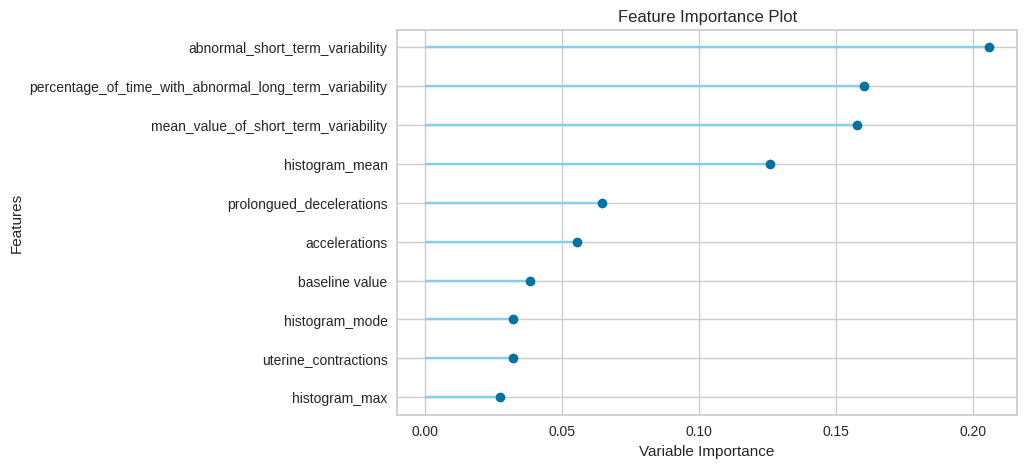

In [ ]:
# Feature Importance
plot_model(tuned_gbc, plot="feature")

This graphical display holds significant value.

It allows us to discern, in a descending hierarchy, the variables that exerted the greatest influence on the model's formulation.

It's not merely about ranking them; the blue line visually quantifies their respective significance in the model's training process.

From this, we ascertain that "abnormal_short_term_variability" emerged as the most pivotal variable.

In [ ]:
# Evaluate the performance of the tuned Gradient Boosting Classifier model
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

###**Finalize the model**

We can then perform predictions on the test set.

In [ ]:
# Prediction on the Test Set
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9443,0.9815,0.9443,0.9442,0.9441,0.8468,0.8469


In [ ]:
final_gbc = finalize_model(tuned_gbc)

In [ ]:
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['baseline value', 'accelerations',
                                             'fetal_movement',
                                             'uterine_contractions',
                                             'light_decelerations',
                                             'severe_decelerations',
                                             'prolongued_deceleratio...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=5, max_features=None,
                            

In [ ]:
# Generate predictions using the final Gradient Boosting Classifier model on the test dataset
# The 'predict_model' function applies the 'final_gbc' model to the 'test' dataset
# The resulting predictions are stored in 'test_preds'
test_preds = predict_model(final_gbc, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9577,0.9845,0.9577,0.9583,0.9562,0.8830,0.8850


In [ ]:
test_preds.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,prediction_label,prediction_score
0,144.0,0.000,0.002,0.000,0.000,0.0,0.0,75.0,0.3,58.0,4.0,10.0,144.0,154.0,2.0,0.0,151.0,150.0,152.0,0.0,1.0,2.0,2,0.9999
1,136.0,0.002,0.000,0.002,0.000,0.0,0.0,54.0,0.5,8.0,9.5,49.0,118.0,167.0,1.0,0.0,151.0,149.0,151.0,7.0,1.0,1.0,1,0.8928
2,112.0,0.009,0.000,0.006,0.000,0.0,0.0,24.0,1.3,6.0,6.4,37.0,105.0,142.0,1.0,0.0,114.0,116.0,115.0,4.0,-1.0,1.0,1,1.0000
3,122.0,0.000,0.000,0.005,0.003,0.0,0.0,27.0,1.2,0.0,10.3,40.0,92.0,132.0,3.0,2.0,120.0,120.0,123.0,4.0,1.0,1.0,1,0.9999
4,133.0,0.006,0.035,0.003,0.001,0.0,0.0,65.0,2.7,0.0,1.1,35.0,126.0,161.0,2.0,0.0,138.0,126.0,140.0,3.0,0.0,1.0,1,1.0000



1. **Model Performance**: The Gradient Boosting Classifier model shows strong performance metrics with an accuracy of 95.77%, AUC (Area Under the Curve) of 98.45%, and similarly high recall and precision. The F1 score is 95.62%, which is a harmonic mean of precision and recall, indicating a balanced performance between these two measures. The Kappa score of 88.30% shows substantial agreement, correcting for chance, and the MCC (Matthews Correlation Coefficient) of 88.50% indicates a high level of quality in binary classifications.

2. **Feature Influence**: From the test predictions, we observe a range of values for features like 'baseline value', 'accelerations', 'fetal_movement', etc. Although the exact influence is not provided, it can be inferred that 'abnormal_short_term_variability' and 'mean_value_of_short_term_variability' might be significant predictors given their highlighted importance in earlier discussions.

3. **Clinical Relevance**: The predictive features relate to different aspects of fetal heart rate monitoring. Features like 'fetal_movement' and 'uterine_contractions' are direct indicators of fetal activity, while 'light_decelerations', 'severe_decelerations', and 'prolongued_decelerations' can be indicators of fetal distress. The variability measures provide insight into the stability of the fetal heart rate.

###**Conclusion:**

The developed Gradient Boosting Classifier has demonstrated high efficacy in predicting fetal health outcomes, as evidenced by robust accuracy and other performance metrics. Clinically significant features such as 'abnormal_short_term_variability' have been pivotal in the model's predictive capability. This model could serve as a reliable tool for healthcare professionals, enabling early intervention through the identification of potential fetal distress, thus supporting better clinical outcomes in prenatal care. The successful implementation of this model signifies a promising step forward in the application of machine learning to enhance fetal health monitoring and intervention strategies.